In [74]:
#Importing Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.gridspec as gridspec

from scipy import stats
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import train_test_split


In [7]:
#Load the data
data = pd.read_csv('concrete.csv')
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


Observation

1.It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
2.All the records are numeric.

In [8]:
#Shape of dataset
data.shape

(1030, 9)

# Exploratory Data Quality Report

a. Univariate analysis 

In [9]:
#Data Type of each attribute
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [10]:
# If columns have null data in the file
data.apply(lambda x : sum(x.isnull()))

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [11]:
#5 point summary of numerical attributes
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


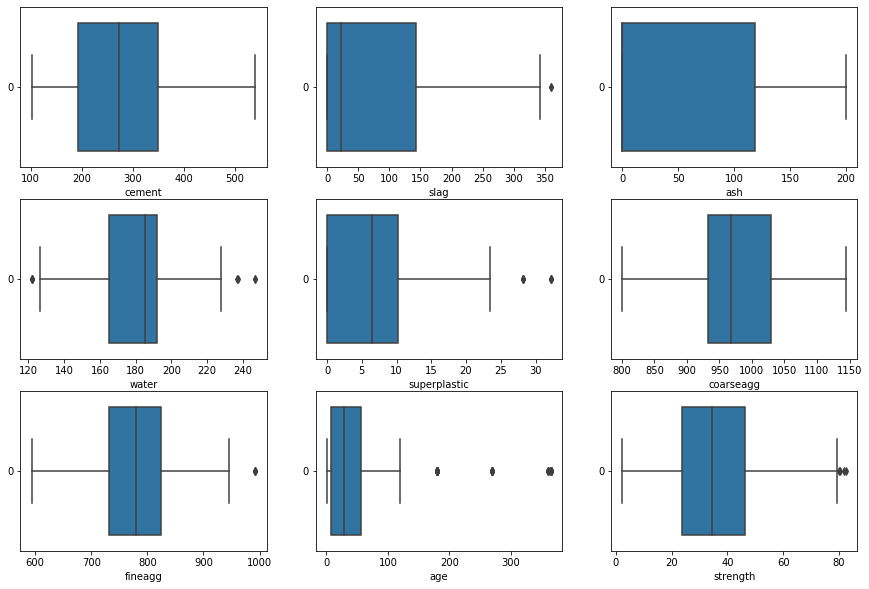

In [12]:
# plot the box plot graph for each
plot.figure(figsize=(15,10))
pos = 1
for column in data.select_dtypes(include=[np.number]):
    plot.subplot(3, 3, pos)
    box_plot = sns.boxplot(data=data[column], orient="h")
    box_plot.set(xlabel=column)
    pos += 1

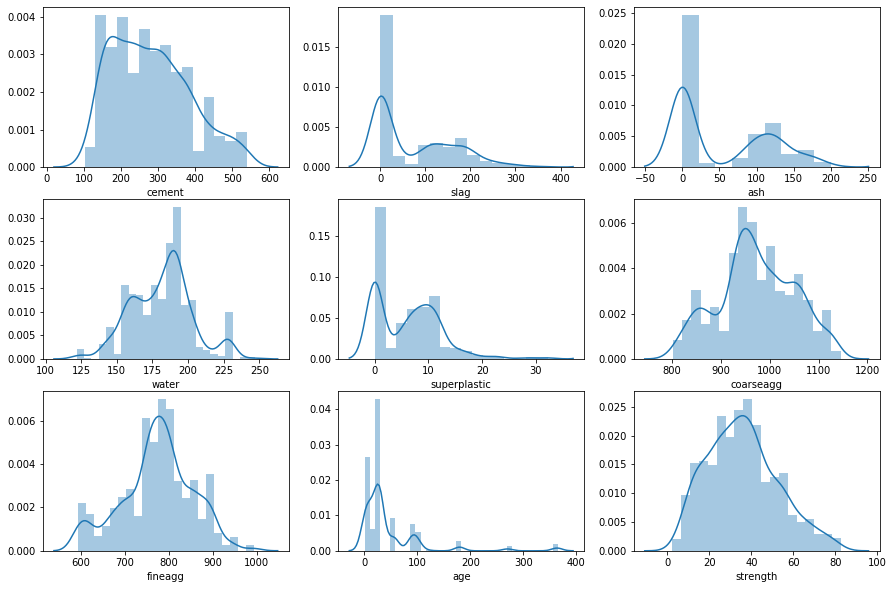

In [13]:

####check the frequency 
plot.figure(figsize=(15,10))
pos = 1
for column in data.select_dtypes(include=[np.number]):
    plot.subplot(3, 3, pos)
    dist_plot=sns.distplot(data[column])
    dist_plot.set(xlabel=column)
    pos += 1

# Observation:

cement -- data distributed Normally
slag -- Tail at the right .. high number of 0's
ash -- Tail at the right ... higher number of 0's
water -- Resonably well balanced data, but multiple peaks
superplastic -- Again large number or 0's, Tail towards right
coarseagg -- Reasonably well balanced data
fineagg -- resonably well balanced data
age -- looks skewed with right tail . Most values seem to be in 28 range (which i think is standard measurement for - compressive strength according to standards) .few outliers at the 300+ range
strength -- seems to be resonably well balanced with little outliers

b. Multivariate analysis 

<Figure size 432x288 with 0 Axes>

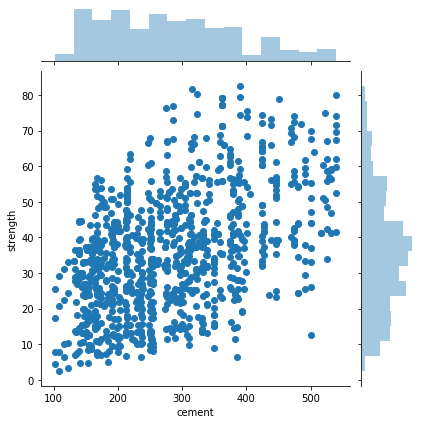

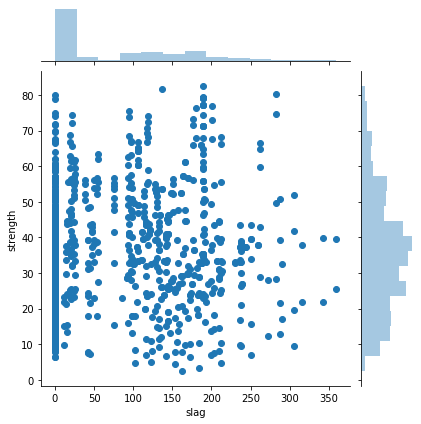

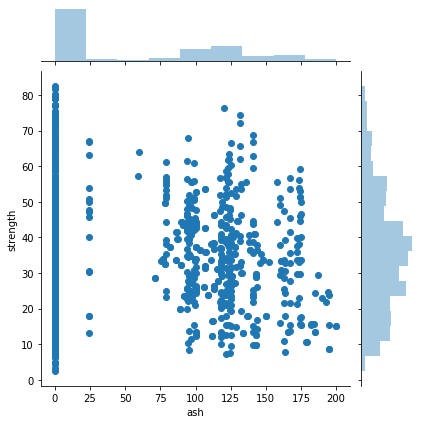

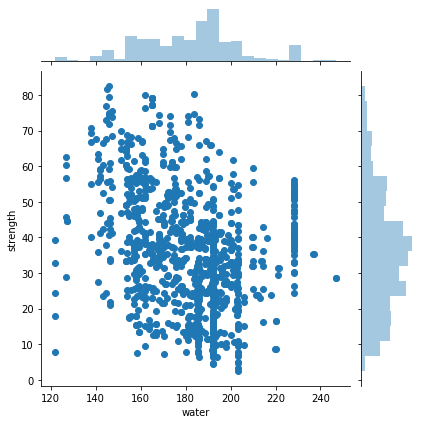

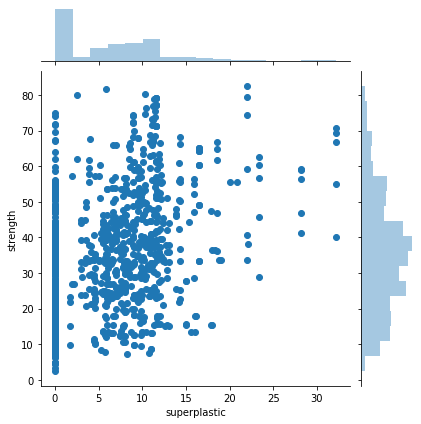

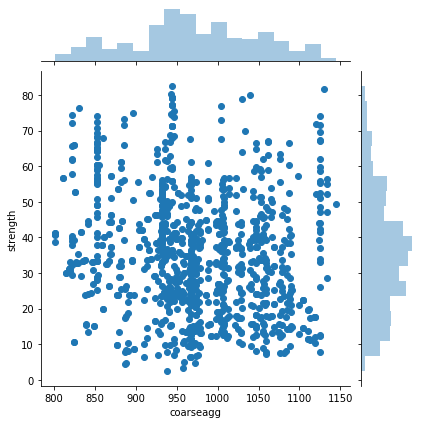

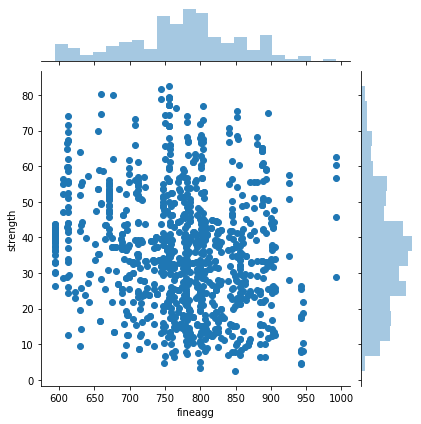

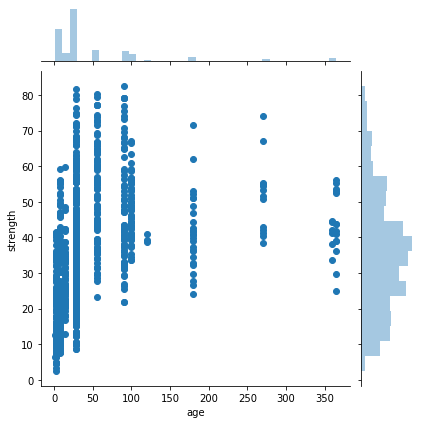

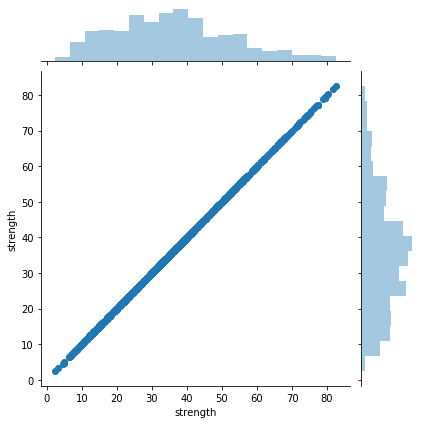

In [70]:
# check joint plot
plot.figure()
for column in data.select_dtypes(include=[np.number]):
    joint_plot = sns.jointplot(x=data[column], y=data['strength'], data=data);

OBservation on the joint plot:

I dont see any strong co-relation of any individual variable with target except for-- cement and strength seem to weakly releated.. i do see strenth slightly increasing with increase of cement.

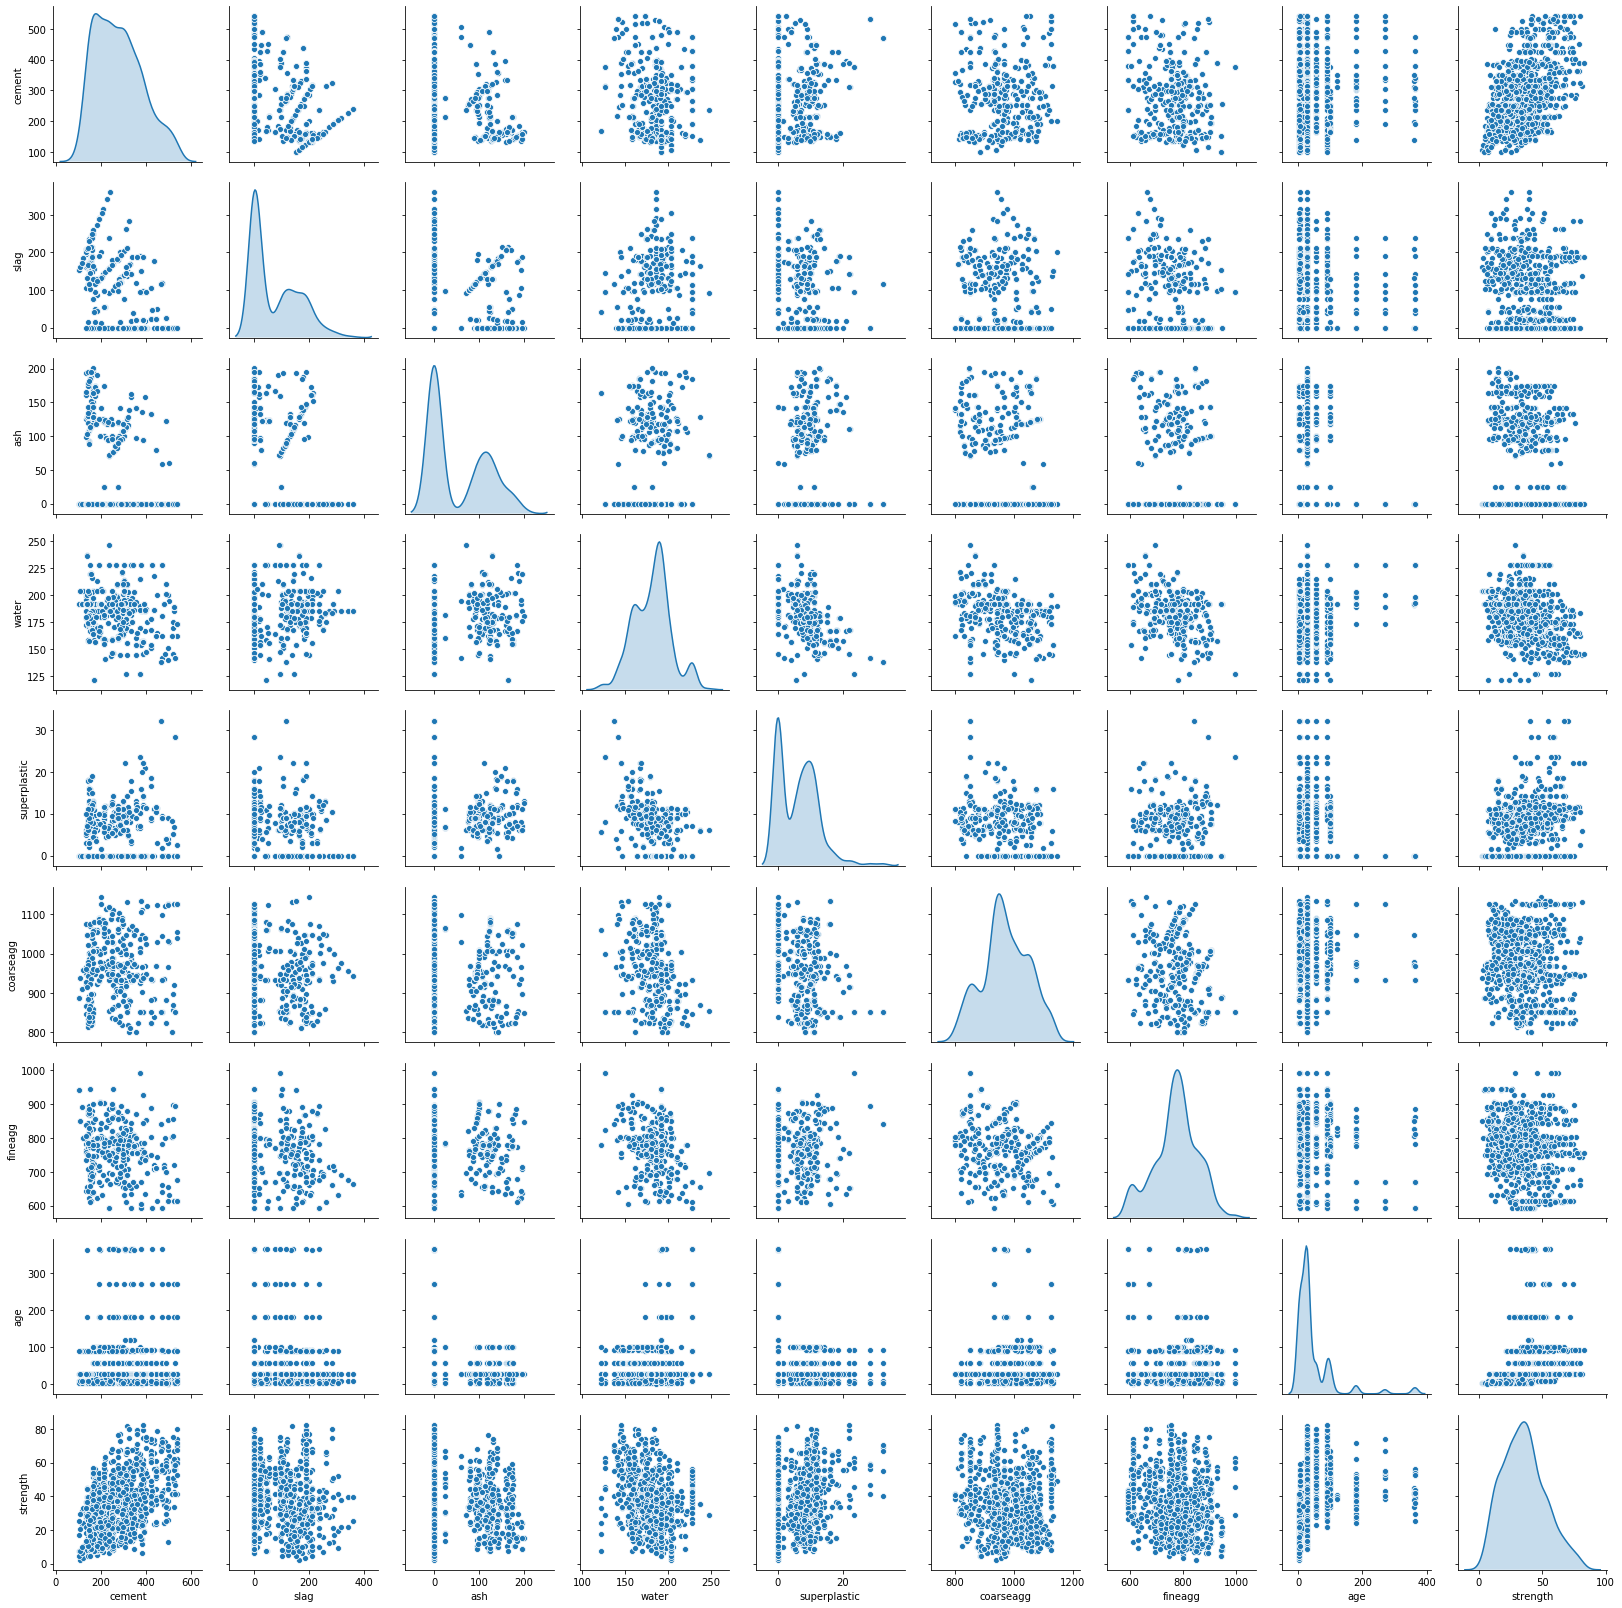

In [71]:
#Lets check pair plot.
sns.pairplot(data, diag_kind="kde")

Some weak co-relation between cement & Strength.. no other variables seem co-related. There are some indications of 2 or more gaussians for slag, ash, superplastic, age ...

#Quartiles Range.

1.CEMENT

In [76]:
#Quartiles

Q1=data['cement'].quantile(q=0.25)
Q3=data['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [77]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [78]:
print('Number of outliers in cement upper : ', data[data['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', data[data['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(data[data['cement']>586.4375]['cement'].count()*100/len(data)), '%')
print('% of Outlier in cement lower: ',round(data[data['cement']<-44.0625]['cement'].count()*100/len(data)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


SLAG

In [80]:
#Quartiles

Q1=data['slag'].quantile(q=0.25)
Q3=data['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [81]:
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [82]:
print('Number of outliers in slag upper : ', data[data['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', data[data['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(data[data['slag']>357.375]['slag'].count()*100/len(data)), '%')
print('% of Outlier in slag lower: ',round(data[data['slag']<-214.425]['slag'].count()*100/len(data)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


ASH

In [83]:
#Quartiles 

Q1=data['ash'].quantile(q=0.25)
Q3=data['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [84]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [85]:
print('Number of outliers in ash upper : ', data[data['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', data[data['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(data[data['ash']>295.75]['ash'].count()*100/len(data)), '%')
print('% of Outlier in ash lower: ',round(data[data['ash']<-177.45]['ash'].count()*100/len(data)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


WATER

In [86]:
#Quartiles
Q1=data['water'].quantile(q=0.25)
Q3=data['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['water']))

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [87]:
# Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [88]:
print('Number of outliers in water upper : ', data[data['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', data[data['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(data[data['water']>232.65]['water'].count()*100/len(data)), '%')
print('% of Outlier in water lower: ',round(data[data['water']<124.25]['water'].count()*100/len(data)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


SUPERPLASTIC

In [89]:
#Quartiles

Q1=data['superplastic'].quantile(q=0.25)
Q3=data['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [90]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [91]:
print('Number of outliers in superplastic upper : ', data[data['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', data[data['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(data[data['superplastic']>25.5]['superplastic'].count()*100/len(data)), '%')
print('% of Outlier in superplastic lower: ',round(data[data['superplastic']<-15.3]['superplastic'].count()*100/len(data)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


Coarseagg

In [92]:
#Quartiles

Q1=data['coarseagg'].quantile(q=0.25)
Q3=data['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [93]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [94]:
print('Number of outliers in coarseagg upper : ', data[data['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', data[data['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(data[data['coarseagg']>1175.5]['coarseagg'].count()*100/len(data)), '%')
print('% of Outlier in coarseagg lower: ',round(data[data['coarseagg']<785.9]['coarseagg'].count()*100/len(data)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


Fineagg

In [95]:
#Quartiles

Q1=data['fineagg'].quantile(q=0.25)
Q3=data['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [96]:
#Outlier detection from Interquartile range (IQR) in original data

# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [97]:
print('Number of outliers in fineagg upper : ', data[data['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', data[data['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(data[data['fineagg']>963.575]['fineagg'].count()*100/len(data)), '%')
print('% of Outlier in fineagg lower: ',round(data[data['fineagg']<591.37]['fineagg'].count()*100/len(data)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


Age

In [98]:
#Quartiles

Q1=data['age'].quantile(q=0.25)
Q3=data['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(data['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [99]:
#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
#lower 1.5*IQR whisker i.e Q1-1.5*IQR
#upper 1.5*IQR whisker i.e Q3+1.5*IQR
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [100]:
print('Number of outliers in age upper : ', data[data['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', data[data['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(data[data['age']>129.5]['age'].count()*100/len(data)), '%')
print('% of Outlier in age lower: ',round(data[data['age']<-66.5]['age'].count()*100/len(data)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


Outliers observation :
    
We have several outlier values in several columns. We could

Get rid of the rows where we have outliers (we will then lose the data -- which is not good)
Recalibrate the outliers on either side to 5th and 95th percentile (in this case we might corrupt the data)
I feel it is better to keep the data as is and try to fit the models and I will come back to normalizing the outliers if models are unable to converge.

# Deliverable -2 (Feature Engineering techniques)
a. Identify opportunities (if any) to create a composite feature, drop a feature

In [14]:
#Lets Standardised the data

from scipy.stats import zscore
data_z = data.apply(zscore)
data_z.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727


Slag and Ash seem very similarly distributed.No need to drop any value for now lets try the model first and then drop if needed

b. Decide on complexity of the model, should it be simple linear mode in terms of parameters or would a quadratic or higher degree help

In [15]:
## Define Dependent(X) and Independent(y) variables
X = data_z.drop('strength', axis=1)
y = data_z['strength']
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


In [16]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [17]:
# Fit Simple Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))
r2 = r2_score(y_test,y_pred)
print(rmse)
print(r2)

#Initialize Result Array for summary
result = pd.DataFrame({'Model' : ['Linear Regression'], 'RMS' : [rmse], 'r2' : [r2],
                      'Comments' : 'Low accuracy explains [r2] percent fit and high error'})

0.6181771145034819
0.6339136715208276


In [18]:
# Make it Polynomial

from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(3)

X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_poly, y_train)
y_poly_pred = model.predict(X_test_poly)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse)
print(r2)

result.loc[1] = ['Linear Reg Polynomial (Deg=3)', rmse, r2, 'reasonable accuracy and low error']

0.3686311214517817
0.8698207817203709


Looks like degree 3 is giving better accuracy

c. Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [19]:
X_poly = polynomial_features.fit_transform(X)
X_poly.shape

(1030, 165)

<Figure size 432x288 with 0 Axes>

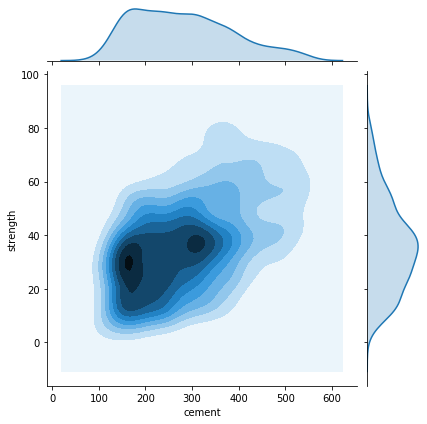

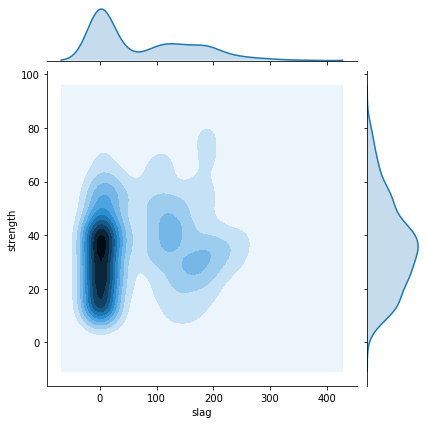

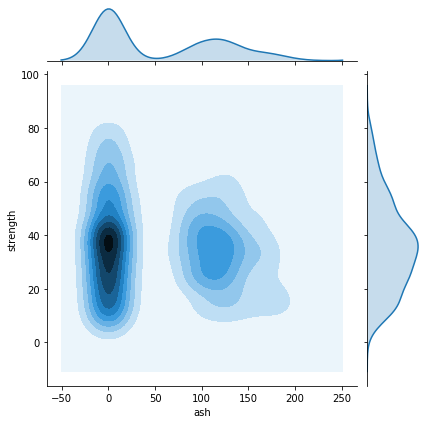

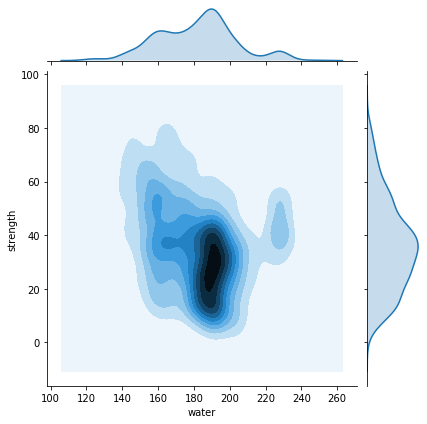

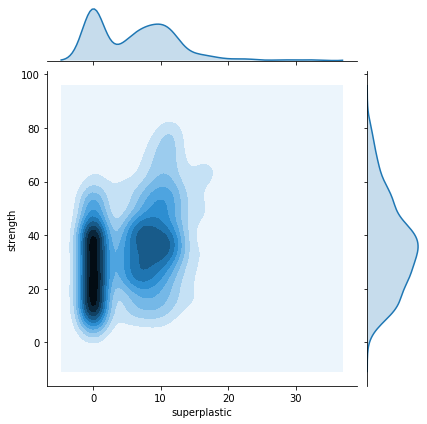

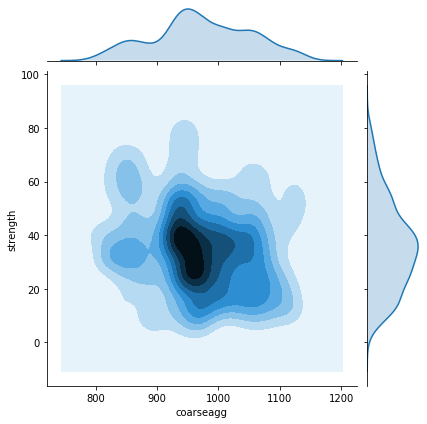

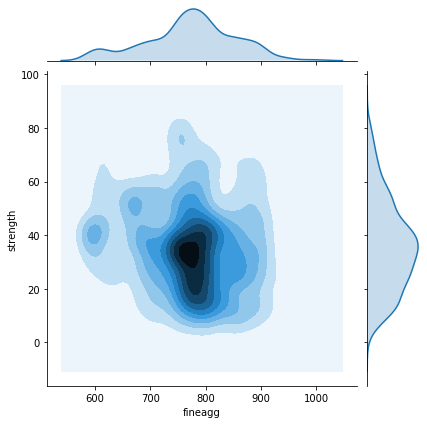

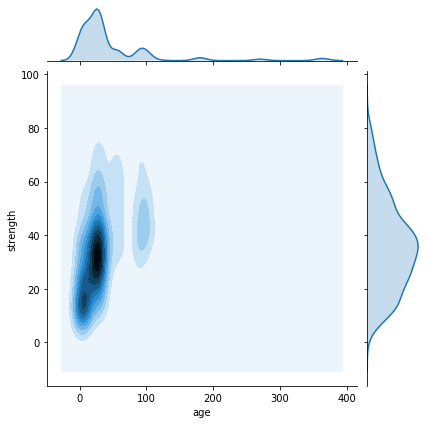

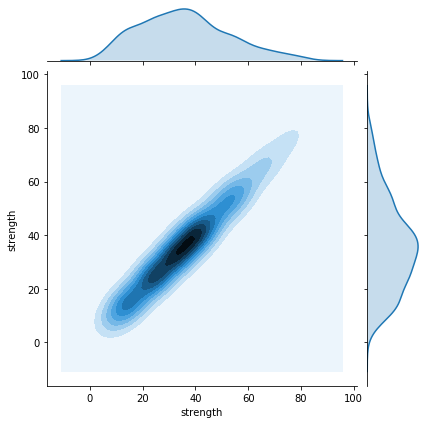

In [20]:
#### Lets check cluster for each variable vs target
plot.figure()
for column in data.select_dtypes(include=[np.number]):
    joint_plot = sns.jointplot(x=data[column], y=data['strength'], data=data, kind='kde');

In [21]:
####  linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_poly, 'ward', metric='euclidean')
Z.shape

(1029, 4)

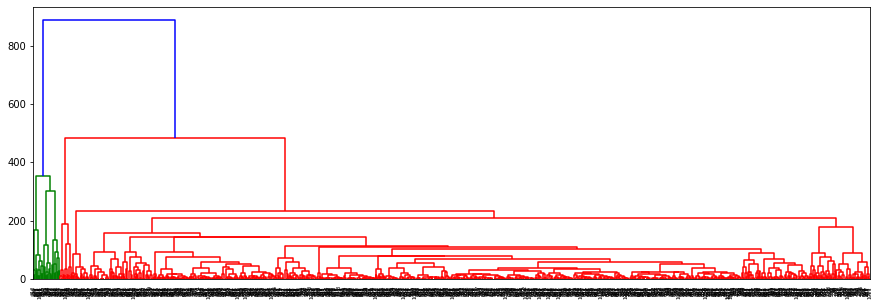

In [22]:
plot.figure(figsize=(15, 5))
dendrogram(Z)
plot.show()

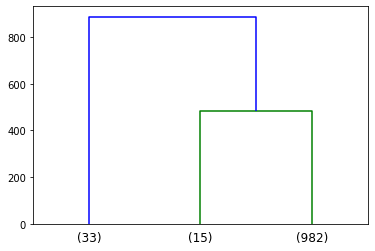

In [23]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plot.show()

It looks like there are no clusters when we check with the POLY X

# 3. Deliverable -3 (create the model )
a. Obtain feature importance for the individual features using multiple methods and present your findings

In [24]:
from sklearn.ensemble import ExtraTreesRegressor

# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

header = list(X.columns)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], header[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 7 age (0.362571)
2. feature 0 cement (0.251731)
3. feature 4 superplastic (0.093553)
4. feature 3 water (0.089943)
5. feature 1 slag (0.084447)
6. feature 6 fineagg (0.044267)
7. feature 2 ash (0.041252)
8. feature 5 coarseagg (0.032237)


In [25]:
forest.fit(X_poly, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_poly.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 8 (0.123953)
2. feature 1 (0.090699)
3. feature 114 (0.050513)
4. feature 164 (0.039432)
5. feature 53 (0.036789)
6. feature 44 (0.029052)
7. feature 60 (0.028741)
8. feature 16 (0.026709)
9. feature 4 (0.024411)
10. feature 5 (0.023203)
11. feature 45 (0.017547)
12. feature 38 (0.016462)
13. feature 52 (0.013926)
14. feature 80 (0.013582)
15. feature 29 (0.013307)
16. feature 87 (0.013152)
17. feature 148 (0.012242)
18. feature 123 (0.012221)
19. feature 10 (0.011600)
20. feature 2 (0.011464)
21. feature 111 (0.011386)
22. feature 26 (0.011231)
23. feature 54 (0.010486)
24. feature 46 (0.009986)
25. feature 23 (0.009963)
26. feature 154 (0.009554)
27. feature 110 (0.008509)
28. feature 84 (0.007406)
29. feature 59 (0.007284)
30. feature 83 (0.007253)
31. feature 3 (0.007088)
32. feature 108 (0.006541)
33. feature 93 (0.006037)
34. feature 88 (0.005828)
35. feature 78 (0.005753)
36. feature 12 (0.005669)
37. feature 9 (0.005501)
38. feature 75 (0.005449)
39.

# Observation - Method 1 :: Using extra trees regressor ensemble for checking feature importance on both X and X_Poly..
for Non-Poly, the age and cement seem to be very important features

Feature ranking:

feature 7 age (0.362571)
feature 0 cement (0.251731)
feature 4 superplastic (0.093553)
for Poly, its difficult to see what derivative is important.. but its listed in descending order

Feature ranking:

feature 8 (0.123953)
feature 1 (0.090699)
feature 114 (0.050513)
feature 164 (0.039432)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

lr = LinearRegression()
lr.fit(X_train, y_train)
rr = Ridge(alpha=0.2) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
coeff_used = np.sum(rr.coef_!=0)


print ("linear regression train score: ", train_score)
print ("linear regression test score: ", test_score)

print ("ridge regression train score low alpha: ", Ridge_train_score)
print ("ridge regression test score low alpha: ", Ridge_test_score)
print ("number of features used: for low alpha", coeff_used)


#print (rr.coef_)

indices = np.argsort(rr.coef_)[::-1]

header = list(X.columns)

# Print the feature ranking
print("Feature ranking low alpha ridge:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], header[indices[f]], rr.coef_[indices[f]]))

rmse = mean_squared_error(y_test,rr.predict(X_test))
r2 = r2_score(y_test,rr.predict(X_test))

result.loc[2] = ['Linear Reg Ridge(alpha=0.2)', rmse, r2, 'low accuracy and high error']

linear regression train score:  0.6031487540630229
linear regression test score:  0.6339136715208276
ridge regression train score low alpha:  0.6031469778446135
ridge regression test score low alpha:  0.6339948097552128
number of features used: for low alpha 8
Feature ranking low alpha ridge:
1. feature 0 cement (0.788236)
2. feature 1 slag (0.558650)
3. feature 7 age (0.417287)
4. feature 2 ash (0.344422)
5. feature 6 fineagg (0.170675)
6. feature 4 superplastic (0.134502)
7. feature 5 coarseagg (0.109478)
8. feature 3 water (-0.134193)


In [27]:
rr1 = Ridge(alpha=1) #  comparison with alpha value
rr1.fit(X_train, y_train)

Ridge_train_score1 = rr1.score(X_train,y_train)
Ridge_test_score1 = rr1.score(X_test, y_test)
coeff_used_1 = np.sum(rr1.coef_!=0)

print ("ridge regression train score high alpha: ", Ridge_train_score1)
print ("ridge regression test score high alpha: ", Ridge_test_score1)
print ("number of features used: for high alpha", coeff_used_1)

#print (rr1.coef_)

indices = np.argsort(rr1.coef_)[::-1]

header = list(X.columns)

# Print the feature ranking
print("Feature ranking high alpha ridge:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], header[indices[f]], rr1.coef_[indices[f]]))
    
rmse = mean_squared_error(y_test,rr1.predict(X_test))
r2 = r2_score(y_test,rr1.predict(X_test))

result.loc[3] = ['Linear Reg Ridge(alpha=1)', rmse, r2, 'low accuracy and high error']

ridge regression train score high alpha:  0.6031071837335765
ridge regression test score high alpha:  0.634267851120949
number of features used: for high alpha 8
Feature ranking high alpha ridge:
1. feature 0 cement (0.774911)
2. feature 1 slag (0.545567)
3. feature 7 age (0.416096)
4. feature 2 ash (0.332698)
5. feature 6 fineagg (0.159104)
6. feature 4 superplastic (0.134552)
7. feature 5 coarseagg (0.100466)
8. feature 3 water (-0.143069)


In [28]:
from sklearn.linear_model import Lasso

lasso02 = Lasso(alpha=0.02, max_iter=10e5)
lasso02.fit(X_train,y_train)
train_score02=lasso02.score(X_train,y_train)
test_score02=lasso02.score(X_test,y_test)
coeff_used02 = np.sum(lasso02.coef_!=0)
print ("training score for alpha=0.02:", train_score02 )
print ("test score for alpha =0.02: ", test_score02)
print ("number of features used: for alpha =0.02:", coeff_used02)

#print (lasso02.coef_)

print("Feature ranking low alpha lasso:")

indices = np.argsort(lasso02.coef_)[::-1]

header = list(X.columns)

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], header[indices[f]], lasso02.coef_[indices[f]]))
    
rmse = mean_squared_error(y_test,lasso02.predict(X_test))
r2 = r2_score(y_test,lasso02.predict(X_test))


training score for alpha=0.02: 0.5929151394087862
test score for alpha =0.02:  0.6233525572361511
number of features used: for alpha =0.02: 7
Feature ranking low alpha lasso:
1. feature 0 cement (0.562763)
2. feature 7 age (0.375468)
3. feature 1 slag (0.334117)
4. feature 4 superplastic (0.159284)
5. feature 2 ash (0.129618)
6. feature 6 fineagg (0.000000)
7. feature 5 coarseagg (-0.000695)
8. feature 3 water (-0.230059)


Observation :
Method 2. Ridge, Lasso..
Using Ridge and lasso, we can see that we get different important featuers.. But lasso accuracy for 0.2 have dropped badly., hence it might not be good idea.

In [29]:
# Ridge Lasso on polynomial

lr = LinearRegression()
lr.fit(X_train_poly, y_train)
rr = Ridge(alpha=0.2) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train_poly, y_train)
train_score=lr.score(X_train_poly, y_train)
test_score=lr.score(X_test_poly, y_test)
Ridge_train_score = rr.score(X_train_poly,y_train)
Ridge_test_score = rr.score(X_test_poly, y_test)
coeff_used = np.sum(rr.coef_!=0)


print ("linear regression train score: ", train_score)
print ("linear regression test score: ", test_score)

print ("ridge regression train score low alpha: ", Ridge_train_score)
print ("ridge regression test score low alpha: ", Ridge_test_score)
print ("number of features used: for low alpha", coeff_used)


#print (rr.coef_)

indices = np.argsort(rr.coef_)[::-1]

# Print the feature ranking
print("Feature ranking low alpha ridge poly input :")

for f in range(X_poly.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], rr.coef_[indices[f]]))
    
rmse = mean_squared_error(y_test,rr.predict(X_test_poly))
r2 = r2_score(y_test,rr.predict(X_test_poly))

result.loc[6] = ['Linear Reg ridge (poly=3)(alpha=0.2)', rmse, r2, 'High accuracy']


linear regression train score:  0.931149773364625
linear regression test score:  0.869820781720371
ridge regression train score low alpha:  0.9290985085773567
ridge regression test score low alpha:  0.8768112408522519
number of features used: for low alpha 164
Feature ranking low alpha ridge poly input :
1. feature 8 (1.336964)
2. feature 1 (0.578506)
3. feature 104 (0.548770)
4. feature 91 (0.531450)
5. feature 85 (0.425795)
6. feature 137 (0.421876)
7. feature 96 (0.366166)
8. feature 103 (0.345514)
9. feature 2 (0.339718)
10. feature 67 (0.338748)
11. feature 88 (0.307825)
12. feature 38 (0.304222)
13. feature 158 (0.301171)
14. feature 5 (0.279709)
15. feature 65 (0.275634)
16. feature 142 (0.243780)
17. feature 150 (0.240458)
18. feature 161 (0.230357)
19. feature 73 (0.223882)
20. feature 112 (0.221803)
21. feature 89 (0.219537)
22. feature 152 (0.215595)
23. feature 83 (0.179654)
24. feature 106 (0.177062)
25. feature 24 (0.176065)
26. feature 82 (0.156473)
27. feature 116 (0.15

In [30]:
from sklearn.linear_model import Lasso

lasso02 = Lasso(alpha=0.02, max_iter=10e5)
lasso02.fit(X_train_poly,y_train)
train_score02=lasso02.score(X_train_poly,y_train)
test_score02=lasso02.score(X_test_poly,y_test)
coeff_used02 = np.sum(lasso02.coef_!=0)
print ("training score for alpha=0.02:", train_score02 )
print ("test score for alpha =0.02: ", test_score02)
print ("number of features used: for alpha =0.02:", coeff_used02)

#print (lasso02.coef_)

print("Feature ranking low alpha lasso:")

indices = np.argsort(lasso02.coef_)[::-1]

for f in range(X_poly.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], lasso02.coef_[indices[f]]))

rmse = mean_squared_error(y_test,lasso02.predict(X_test_poly))
r2 = r2_score(y_test,lasso02.predict(X_test_poly))

result.loc[7] = ['Linear Reg ridge (poly=3)(alpha=0.02)', rmse, r2, 'good accuracy']

training score for alpha=0.02: 0.8519303418356055
test score for alpha =0.02:  0.8081549840215587
number of features used: for alpha =0.02: 45
Feature ranking low alpha lasso:
1. feature 8 (0.937952)
2. feature 1 (0.354038)
3. feature 2 (0.257308)
4. feature 5 (0.128851)
5. feature 87 (0.084940)
6. feature 60 (0.081632)
7. feature 164 (0.067365)
8. feature 157 (0.053202)
9. feature 109 (0.040725)
10. feature 45 (0.037242)
11. feature 84 (0.034857)
12. feature 134 (0.032985)
13. feature 53 (0.029781)
14. feature 81 (0.023562)
15. feature 130 (0.023288)
16. feature 150 (0.022950)
17. feature 103 (0.014113)
18. feature 114 (0.013744)
19. feature 117 (0.011001)
20. feature 30 (0.010612)
21. feature 75 (0.006692)
22. feature 104 (0.006081)
23. feature 40 (0.005497)
24. feature 66 (0.004985)
25. feature 99 (0.002385)
26. feature 65 (-0.000000)
27. feature 64 (0.000000)
28. feature 52 (0.000000)
29. feature 79 (0.000000)
30. feature 78 (0.000000)
31. feature 77 (0.000000)
32. feature 76 (-0.0

Observation : Method 2 :: Ridge and Lasso on Poly input
Ridge ::

Feature ranking low alpha ridge poly input :

feature 8 (1.336964)
feature 1 (0.578506)
feature 104 (0.548770)
feature 91 (0.531450)
feature 85 (0.425795)
feature 137 (0.421876)
Lasso ::

feature 8 (0.937952)
feature 1 (0.354038)
feature 2 (0.257308)
feature 5 (0.128851)

# 4. Deliverable -4 (Tuning the model)
a. Algorithms that you think will be suitable for this project:

[444.70744935 133.36042833  64.2101853   44.22407866  29.75890613
  23.42464226  20.9956647   18.03825802  12.25528841  10.3967529
   8.76461471   8.2811354    7.76095415   6.63974982   5.33228418
   5.12996156   4.22007826   4.02793695   3.62095426   3.33651049
   3.01165851   2.80055415   2.67356464   2.62280664   2.29484512]
[0.48590914 0.14571613 0.07015919 0.04832139 0.03251604 0.02559491
 0.02294089 0.01970948 0.01339073 0.01136    0.00957665 0.00904837
 0.00848    0.00725492 0.00582631 0.00560525 0.00461106 0.00440112
 0.00395643 0.00364563 0.00329069 0.00306002 0.00292127 0.00286581
 0.00250746]


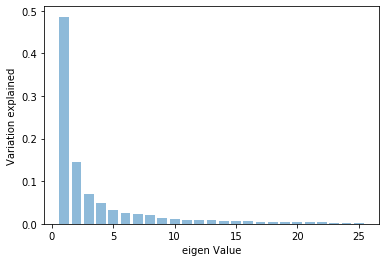

In [31]:

### we shall try to PCA the  POLY.. 

from sklearn.decomposition import PCA 

pca = PCA(n_components=25)
pca.fit(X_poly)

print(pca.explained_variance_)

print(pca.explained_variance_ratio_)

plot.bar(list(range(1,26)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plot.ylabel('Variation explained')
plot.xlabel('eigen Value')
plot.show()

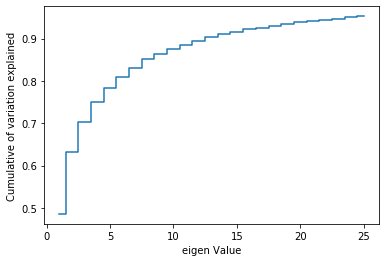

In [32]:
plot.step(list(range(1,26)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plot.ylabel('Cumulative of variation explained')
plot.xlabel('eigen Value')
plot.show()

In [33]:

# 95 Per cent qantification
print(pca.explained_variance_ratio_.cumsum())

[0.48590914 0.63162527 0.70178446 0.75010586 0.78262189 0.80821681
 0.8311577  0.85086718 0.86425791 0.87561791 0.88519456 0.89424293
 0.90272293 0.90997785 0.91580416 0.92140941 0.92602047 0.93042159
 0.93437803 0.93802366 0.94131435 0.94437437 0.94729564 0.95016144
 0.9526689 ]


Looks like to capture 95% of the of variance we need 25 components (out of 145+ poly features)

In [34]:
X_poly_pca = pca.transform(X_poly)
X_poly_pca.shape

(1030, 25)

In [35]:
# Lets try to fit the same poly model as earlier to check accuracy and confirm if PCA is sufficient.

X_poly_PCA_train, X_poly_PCA_test, y_train, y_test = train_test_split(X_poly_pca, y, test_size=0.30, random_state=1)


model = LinearRegression()
model.fit(X_poly_PCA_train, y_train)
y_poly_PCA_pred = model.predict(X_poly_PCA_test)

rmse = np.sqrt(mean_squared_error(y_test,y_poly_PCA_pred))
r2 = r2_score(y_test,y_poly_pred)
print(rmse) # non pca value  0.36
print(r2) #non pca value 0.87 

result.loc[8] = ['Linear Reg ridge (PCA=25)', rmse, r2, 'good accuracy']

0.7272821699222356
0.8698207817203709


Error has increased .. but accuracy remains same.
Lets try several models for this and check which one is better fitting.

In [36]:
#SVM
from sklearn import svm
clf_PCA = svm.SVR(gamma=0.01,kernel='rbf',C=10)
clf_PCA.fit(X_poly_PCA_train,y_train)
pred_train = clf_PCA.predict(X_poly_PCA_train)

In [37]:
clf_PCA.score(X_poly_PCA_train, y_train)

0.9230348567529814

In [38]:

pred_test = clf_PCA.predict(X_poly_PCA_test)
clf_PCA.score(X_poly_PCA_test, y_test)

0.8050138749825442

In [39]:
rmse = mean_squared_error(y_test,pred_test)
r2 = r2_score(y_test,pred_test)

result.loc[9] = ['SVM (PCA)(rbf kernel)', rmse, r2, 'good accuracy']

Observation : Getting  80% with test set on SVR

In [40]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=25, random_state=0, n_estimators=100)
regr.fit(X_poly_PCA_train, y_train)  
y_poly_pred=regr.predict(X_poly_PCA_test)
print(mean_squared_error(y_test,y_poly_pred))
print(r2_score(y_test,y_poly_pred))

rmse = mean_squared_error(y_test,y_poly_pred)
r2 = r2_score(y_test,y_poly_pred)

result.loc[11] = ['Random Forest Regressor (poly=3)(PCA=25)', rmse, r2, 'good accuracy']

0.19777650750147416
0.8105335282053134


Observation : getting 81% with Random Forest Regressor

In [41]:
from xgboost import XGBRegressor
xgb_model  = XGBRegressor(max_depth=5, learning_rate=0.2, n_estimators=100, objective='reg:squarederror', booster='gbtree')
xgb_model= xgb_model.fit(X_poly_PCA_train, y_train)
pred_train = xgb_model.predict(X_poly_PCA_train)
pred_test = xgb_model.predict(X_poly_PCA_test)

In [42]:
#5training score
xgb_model.score(X_poly_PCA_train , y_train)

0.9937310737706251

In [43]:
#Testing score
xgb_model.score(X_poly_PCA_test , y_test)

0.8314835953876542

In [44]:
rmse = mean_squared_error(y_test,pred_test)
r2 = r2_score(y_test,pred_test)

result.loc[12] = ['XG Boost Regressor (poly=3)(PCA=25)(gbtree,max_depth=5)', rmse, r2, 'good accuracy']

Getting 83% test accuracy with XG Boost..for PCA input.

In [45]:

#Just trying once with NON-PCA
xgb_model  = XGBRegressor(max_depth=5, learning_rate=0.2, n_estimators=100, objective='reg:squarederror', booster='gbtree')
xgb_model= xgb_model.fit(X_train_poly, y_train)
pred_train = xgb_model.predict(X_train_poly)
pred_test = xgb_model.predict(X_test_poly)

In [46]:
xgb_model.score(X_train_poly , y_train)

0.9944024653141396

In [47]:
xgb_model.score(X_test_poly , y_test)

0.8986130782407235

In [48]:
rmse = mean_squared_error(y_test,pred_test)
r2 = r2_score(y_test,pred_test)

result.loc[13] = ['XG Boost Regressor (poly=3)(gbtree,max_depth=5)', rmse, r2, 'Best accuracy & least error']


Also, without PCA, im able to get 89.86% score with XGBoost

    b. Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit
Split Train, Validate, Test

In [49]:
X_poly_train, X_poly_test_intermediate, y_train, y_test_intermediate = train_test_split(X_poly, y, test_size=0.40, random_state=1)

In [50]:

X_poly_validate, X_poly_test, y_validate, y_test = train_test_split(X_poly_test_intermediate, y_test_intermediate, test_size=0.50, random_state=1)

In [51]:
X_poly_train.shape

(618, 165)

In [52]:
y_train.shape

(618,)

In [53]:
X_poly_validate.shape

(206, 165)

In [54]:

y_validate.shape

(206,)

In [55]:
X_poly_test.shape

(206, 165)

In [56]:
 y_test.shape

(206,)

In [57]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4], 'objective': ['reg:squarederror']}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params, cv=5)
grid.fit(X_poly_train, y_train)

# Print the r2 score - validate
print(r2_score(y_validate, grid.best_estimator_.predict(X_poly_validate)))

0.8976147855627935


In [58]:
# Print the r2 score - test
r2 = r2_score(y_test, grid.best_estimator_.predict(X_poly_test))
rmse= np.sqrt(mean_squared_error(y_test,grid.best_estimator_.predict(X_poly_test)))

result.loc[14] = ['Grid Search CV XG Boost Regressor (poly=3)', rmse, r2, 'good accuracy']

rmse
r2

0.8852001149777903

In [59]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.30, random_state=1)

# A parameter grid for XGBoost
params = {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)],  'subsample':[i/10.0 for i in range(6,11)],
'colsample_bytree':[i/10.0 for i in range(6,11)], 'max_depth': [2,3,4,5,6], 'objective': ['reg:squarederror']}

# Initialize XGB and GridSearch
xgb = XGBRegressor(nthread=-1) 

grid = GridSearchCV(xgb, params, cv=5)
grid.fit(X_train_orig, y_train_orig)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constrain...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
                         'gamma': [0.3, 0.4, 0.5], 'max_depth': [2, 3,

In [60]:
# Print the r2 score - test
r2 = r2_score(y_test_orig, grid.best_estimator_.predict(X_test_orig))
rmse= np.sqrt(mean_squared_error(y_test_orig,grid.best_estimator_.predict(X_test_orig)))

print (rmse)
print (r2)

result.loc[15] = ['Grid Search CV XG Boost Regressor (original X)', rmse, r2, 'great accuracy']

0.3149008832366122
0.9050039774625155


Looks like with Raw X we are getting good result with grid search .. R2 = 90% and rmse of 31%
c. Model performance range at 95% confidence level

In [61]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

estimators = []
estimators.append(('standardize', preprocessing.StandardScaler()))
estimators.append(('xgb', XGBRegressor(objective='reg:squarederror')))
pipe = Pipeline(estimators)

pipe.fit(X_train_orig, y_train_orig)

pipe.score(X_test_orig, y_test_orig)

0.9226297318212445

In [62]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X, y, cv=5)
scores

array([0.89118812, 0.94685408, 0.91167533, 0.93435908, 0.93339064])

In [63]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.92 (+/- 0.02)


92% accuracy with 99 % confidence level

In [64]:
params_grid = {'xgb__min_child_weight':[4,5], 'xgb__gamma':[i/10.0 for i in range(3,6)],  'xgb__subsample':[i/10.0 for i in range(6,11)],
'xgb__colsample_bytree':[i/10.0 for i in range(6,11)], 'xgb__max_depth': [2,3,4,5,6], 'xgb__objective': ['reg:squarederror']}

grid_search = GridSearchCV(estimator=pipe, param_grid=params_grid,n_jobs=-1, cv=5)

grid_search.fit(X_train_orig,y_train_orig)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('standardize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('xgb',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     gamma=0, gpu_id=-1,
                                                     importance_type='gain',
                                                     interaction_constraints='',
 

In [65]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardize', 'xgb', 'standardize__copy', 'standardize__with_mean', 'standardize__with_std', 'xgb__objective', 'xgb__base_score', 'xgb__booster', 'xgb__colsample_bylevel', 'xgb__colsample_bynode', 'xgb__colsample_bytree', 'xgb__gamma', 'xgb__gpu_id', 'xgb__importance_type', 'xgb__interaction_constraints', 'xgb__learning_rate', 'xgb__max_delta_step', 'xgb__max_depth', 'xgb__min_child_weight', 'xgb__missing', 'xgb__monotone_constraints', 'xgb__n_estimators', 'xgb__n_jobs', 'xgb__num_parallel_tree', 'xgb__random_state', 'xgb__reg_alpha', 'xgb__reg_lambda', 'xgb__scale_pos_weight', 'xgb__subsample', 'xgb__tree_method', 'xgb__validate_parameters', 'xgb__verbosity'])

In [66]:
grid_search.best_score_

0.9090019356892213

In [67]:
gcv_scores = grid_search.cv_results_['mean_test_score']
gcv_scores_std = grid_search.cv_results_['std_test_score']

print("Accuracy: %0.2f (+/- %0.2f)" % (gcv_scores.mean(), gcv_scores.std()))

Accuracy: 0.89 (+/- 0.01)


89% accuracy with 99 % confidence level

# Result Summary


In [68]:
result

,Model,RMS,r2,Comments
0,Linear Regression,0.618177,0.633914,Low accuracy explains [r2] percent fit and hig...
1,Linear Reg Polynomial (Deg=3),0.368631,0.869821,reasonable accuracy and low error
2,Linear Reg Ridge(alpha=0.2),0.382058,0.633995,low accuracy and high error
3,Linear Reg Ridge(alpha=1),0.381773,0.634268,low accuracy and high error
6,Linear Reg ridge (poly=3)(alpha=0.2),0.128592,0.876811,High accuracy
7,Linear Reg ridge (poly=3)(alpha=0.02),0.200259,0.808155,good accuracy
8,Linear Reg ridge (PCA=25),0.727282,0.869821,good accuracy
9,SVM (PCA)(rbf kernel),0.203538,0.805014,good accuracy
11,Random Forest Regressor (poly=3)(PCA=25),0.197777,0.810534,good accuracy
12,"XG Boost Regressor (poly=3)(PCA=25)(gbtree,max...",0.175908,0.831484,good accuracy
